# Visualization with hierarchical clustering and t-SNE
> A Summary of lecture "Unsupervised Learning with scikit-learn", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning, Visualization]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing hierarchies
- Visualizations communicate insight
    - 't-SNE': Creates a 2D map of a dataset
    - 'Hierarchical clustering'
- A hierarchy of groups
    - Groups of living things can form a hierarchy
    - Cluster are contained in one another
- Hierarchical clustering
    - Every element begins in a separate cluster
    - At each step, the two closest clusters are merged
    - Continue until all elements in a single cluster
    - This is **"agglomerative"(or divisive)** hierarchical clustering

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy ```linkage()``` function performs hierarchical clustering on an array of samples. Use the ```linkage()``` function to obtain a hierarchical clustering of the grain samples, and use ```dendrogram()``` to visualize the result. A sample of the grain measurements is provided in the array ```samples```, while the variety of each grain sample is given by the list ```varieties```.

#### Preprocess

In [2]:
df = pd.read_csv('./dataset/seeds.csv', header=None)
df[7] = df[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [3]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

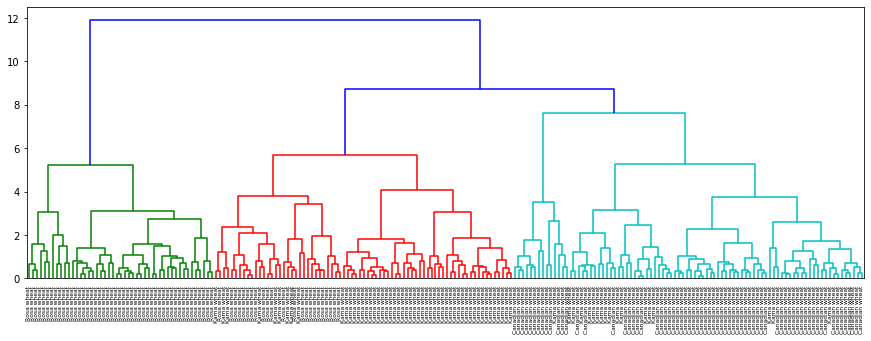

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15, 5))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
          );

### Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements ```movements```, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the ```normalize()``` function from ```sklearn.preprocessing``` instead of ```Normalizer```.

#### Preprocess

In [11]:
df = pd.read_csv('./dataset/company-stock-movements-2010-2015-incl.csv', index_col=0)
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [12]:
movements = df.values
companies = df.index.values

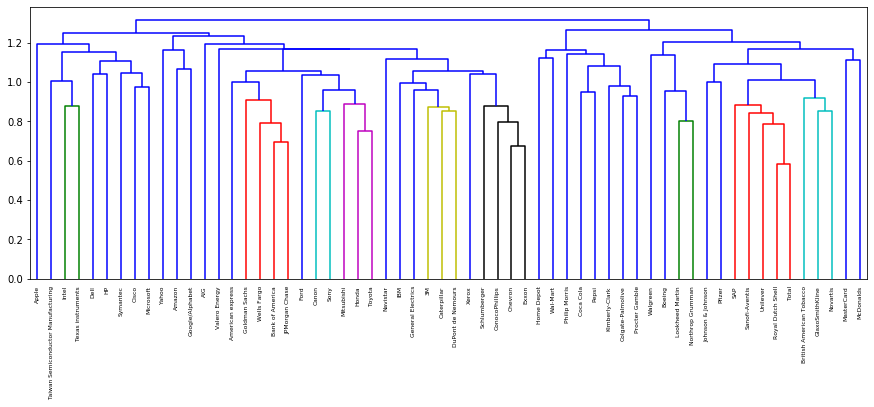

In [14]:
from sklearn.preprocessing import normalize

# Normalize the movements: normalize_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(mergings, 
           labels=companies,
           leaf_rotation=90,
          leaf_font_size=6);

## Cluster labels in hierarchical clustering
- Intermediate clusterings & height on dendrogram
    - Height on dendrogram specifies max. distance between merging clusters
    - Don't merge clusters further apart than this.
- Distance between clusters
    - Defined by "linkage method"
    - In "complete" linkage: distance between clusters is max. distance between their samples
    - Different linkage method, different hierarchical clustering

### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using ```'complete'``` linkage. Now, perform a hierarchical clustering of the voting countries with ```'single'``` linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array ```samples```. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list ```country_names``` gives the name of each voting country. This dataset was obtained from [Eurovision](http://www.eurovision.tv/page/results).

#### Preprocess


In [16]:
df = pd.read_csv('./dataset/eurovision-2016.csv')
df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN


In [19]:
samples = df.iloc[:, 2:7].values[:42]
country_names = df.iloc[:, 1].values[:42]

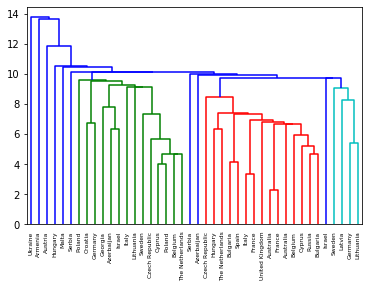

In [21]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90, 
           leaf_font_size=6);

### Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the ```fcluster()``` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

#### Preprocess

In [22]:
df = pd.read_csv('./dataset/seeds.csv', header=None)
df[7] = df[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [23]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

In [24]:
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method='complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0
